### Import Block

In [516]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [517]:
train_file_path = 'lab2_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

### Familiarization

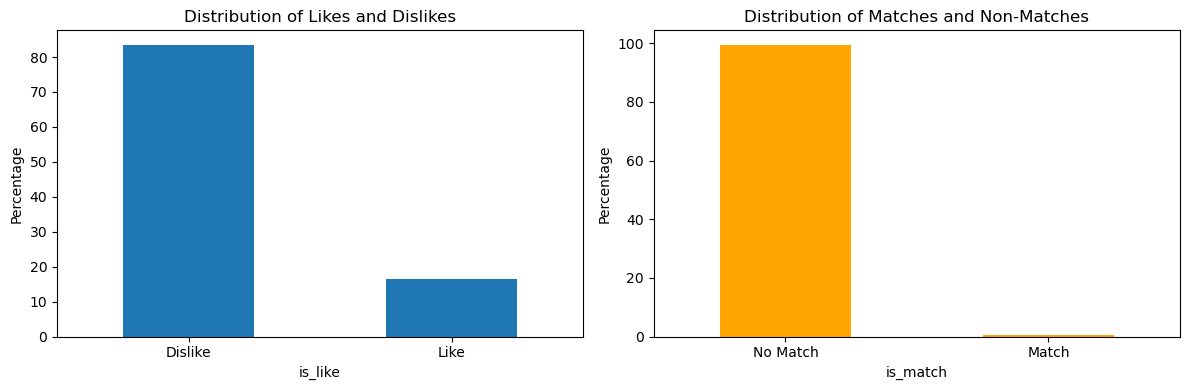

In [518]:
like_counts = train_data['is_like'].value_counts(normalize=True) * 100
match_counts = train_data['is_match'].value_counts(normalize=True) * 100

# Plot the distribution of likes and dislikes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
like_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Likes and Dislikes')
plt.xlabel('is_like')
plt.ylabel('Percentage')
plt.xticks(range(len(like_counts.index)), ['Dislike', 'Like'])

# Plot the distribution of matches and non-matches
plt.subplot(1, 2, 2)
match_counts.plot(kind='bar', rot=0, color='orange')
plt.title('Distribution of Matches and Non-Matches')
plt.xlabel('is_match')
plt.ylabel('Percentage')
plt.xticks(range(len(match_counts.index)), ['No Match', 'Match'])

plt.tight_layout()
plt.show()

1. What properties of the data do you think are important for your pipeline design?
Think of the data sparsity and distribution of labels. 

As for the distribution of labels, we can the is_match label has very little data that has true values. The is_like label has a relatively proper distribution. So the is_like column is more important. 

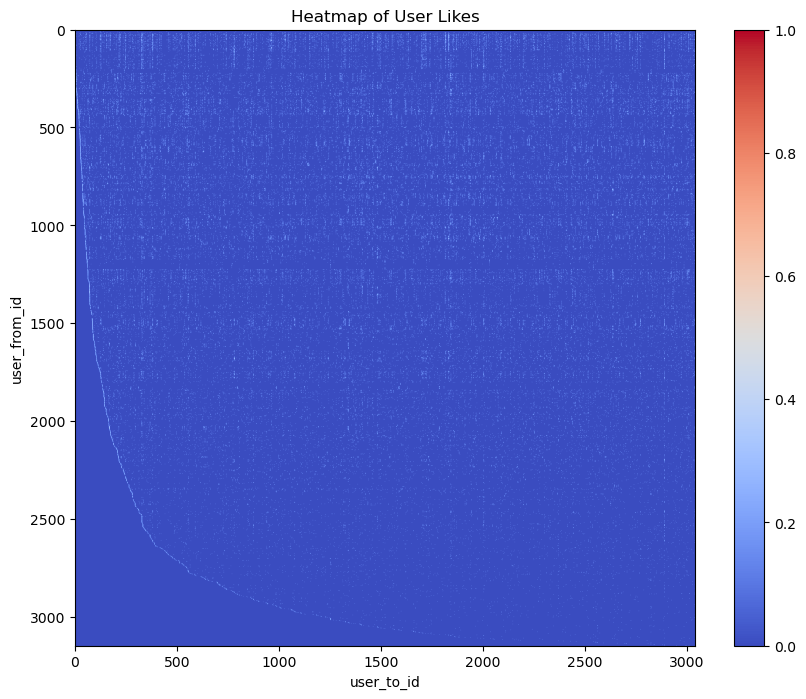

In [519]:
pivot_data = train_data.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for 'True' values in the pivot table
mask = pivot_data.copy()
mask[pivot_data == 0] = 1  # Set 1 in the mask for all entries with values
mask[pivot_data.isnull()] = 0 # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap='coolwarm', aspect='auto')  # Use the 'coolwarm' colormap or choose as per preference
plt.title('Heatmap of User Likes')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar() 

plt.show()



We can see the blue part dominates the heatmap, which means our data is very sparse. We can imagine that some users just started using this app or have not been using it for a long time, so they have very little interaction with other users(we have very little data for those users liked/unliked other users or were liked/unliked by others). So we can filter out those users with little interaction when preprocessing the data. 

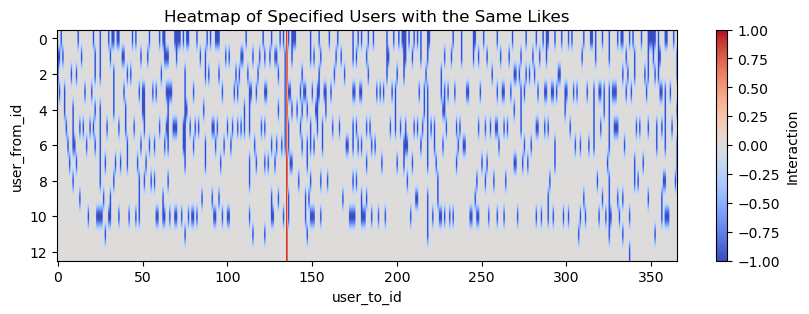

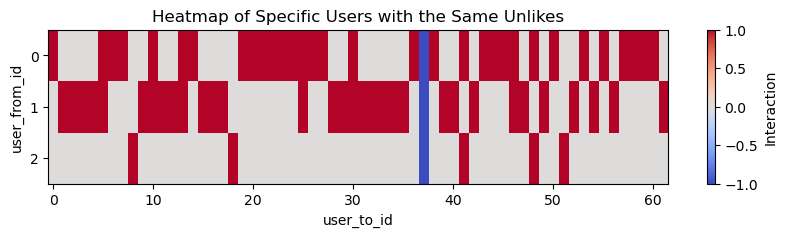

In [520]:
# Filter interactions for specified 'user_from_id' values
specified_users = [3476, 400, 1021, 256, 2383, 242, 1621, 1343, 1505, 2058, 1362, 2232, 257]
filtered_data = train_data[train_data['user_from_id'].isin(specified_users)]

# Create a pivot table from the filtered data
pivot_data = filtered_data.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask = pivot_data.copy()
mask[pivot_data == False] = -1  # Set -1 in the mask for 'False' entries
mask[pivot_data.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(10, 3))
plt.imshow(mask, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specified Users with the Same Likes')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

# Filter interactions for specified 'user_from_id' values
specified_users = [2903, 1572, 1739]
filtered_data = train_data[train_data['user_from_id'].isin(specified_users)]

# Create a pivot table from the filtered data
pivot_data = filtered_data.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask = pivot_data.copy()
mask[pivot_data == False] = -1  # Set -1 in the mask for 'False' entries
mask[pivot_data.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(10, 2))
plt.imshow(mask, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specific Users with the Same Unlikes')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

2. Do you see different types of people (in terms of both which id pairs are present
and what they like/don’t like)?

Yes. We can see the specified users all liked/unliked the same user(s).

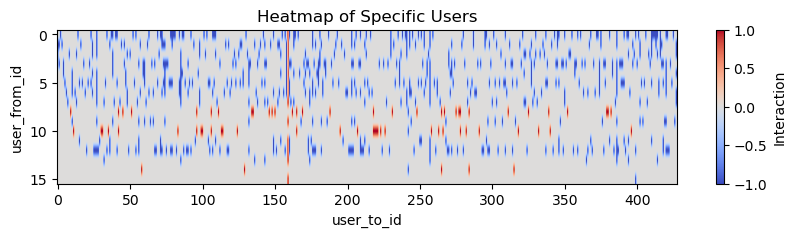

In [521]:

# Filter interactions for specified 'user_from_id' values
specified_users = [3476, 400, 1021, 256, 2383, 242, 1621, 1343, 1505, 2058, 1362, 2232, 257, 2903, 1572, 1739]
filtered_data = train_data[train_data['user_from_id'].isin(specified_users)]

# Create a pivot table from the filtered data
pivot_data = filtered_data.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask = pivot_data.copy()
mask[pivot_data == False] = -1  # Set -1 in the mask for 'False' entries
mask[pivot_data.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(10, 2))
plt.imshow(mask, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specific Users')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

Now we plot the specified users above together to figure out the relations between them. We can see that they are indeed different kinds of users(different preferences).

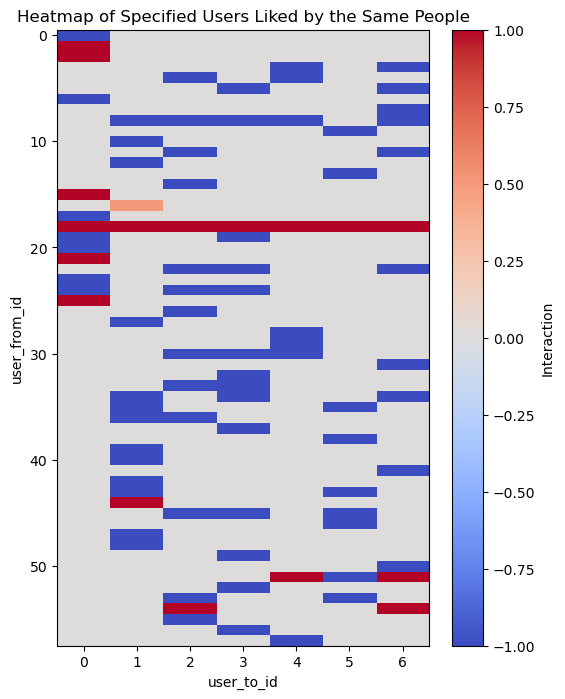

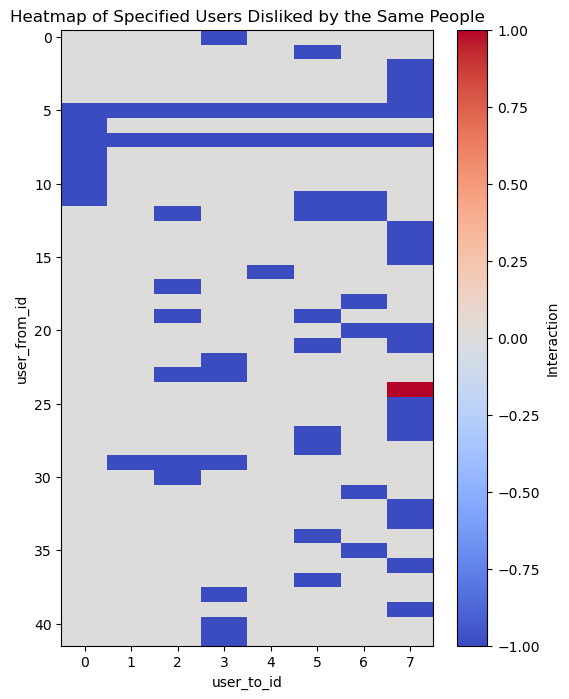

In [522]:
# Filter interactions for specified 'user_to_id' values
specified_users_2 = [740, 2394, 1387, 62, 3024, 554, 2925]
filtered_data_2 = train_data[train_data['user_to_id'].isin(specified_users_2)]

# Create a pivot table from the filtered data
pivot_data_2 = filtered_data_2.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask_2 = pivot_data_2.copy()
mask_2[pivot_data_2 == False] = -1  # Set -1 in the mask for 'False' entries
mask_2[pivot_data_2.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(6, 8))
plt.imshow(mask_2, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specified Users Liked by the Same People')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

# Filter interactions for specified 'user_to_id' values
specified_users_2 = [2874, 16, 2420, 1934, 276, 954, 93, 1452]
filtered_data_2 = train_data[train_data['user_to_id'].isin(specified_users_2)]

# Create a pivot table from the filtered data
pivot_data_2 = filtered_data_2.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask_2 = pivot_data_2.copy()
mask_2[pivot_data_2 == False] = -1  # Set -1 in the mask for 'False' entries
mask_2[pivot_data_2.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(6, 8))
plt.imshow(mask_2, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specified Users Disliked by the Same People')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

We can see that the specified users are liked/unliked by the same user.

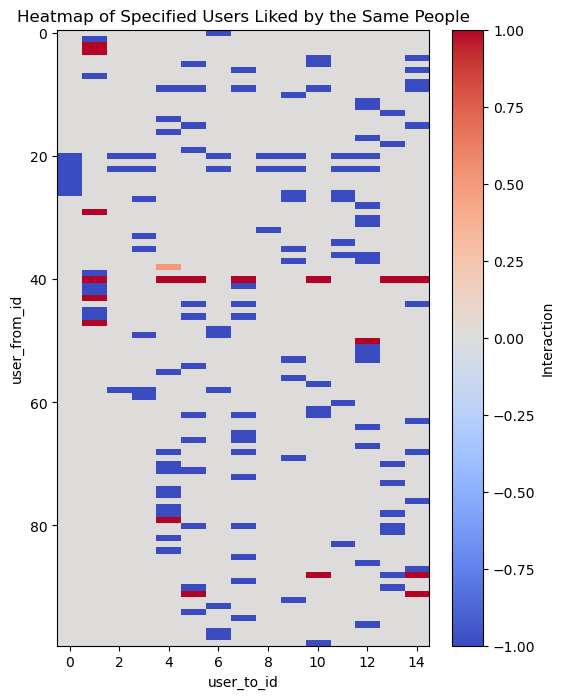

In [523]:
# Filter interactions for specified 'user_to_id' values
specified_users_2 = [740, 2394, 1387, 62, 3024, 554, 2925, 2874, 16, 2420, 1934, 276, 954, 93, 1452]
filtered_data_2 = train_data[train_data['user_to_id'].isin(specified_users_2)]

# Create a pivot table from the filtered data
pivot_data_2 = filtered_data_2.pivot_table(index='user_from_id', columns='user_to_id', values='is_like')

# Create a mask for values in the pivot table
mask_2 = pivot_data_2.copy()
mask_2[pivot_data_2 == False] = -1  # Set -1 in the mask for 'False' entries
mask_2[pivot_data_2.isnull()] = 0  # Set 0 for null entries, to show the contrast

# Create a heatmap using plt.imshow()
plt.figure(figsize=(6, 8))
plt.imshow(mask_2, cmap='coolwarm', aspect='auto')
plt.title('Heatmap of Specified Users Liked by the Same People')
plt.xlabel('user_to_id')
plt.ylabel('user_from_id')
plt.colorbar(label='Interaction')  # Add color bar indicating interaction

plt.show()

Now we plot the specified users above together to figure out the relations between them. We can see that they are indeed different kinds of users(being liked/unliked by different users).

## NMF-based recommender system

Here we use **multiplicative update** algorithm. 
np.random.rand() generates matrices filled with random values from a uniform distribution between 0 and 1. Since the initializations are similar to the original data(0 or 1), normalization is not necessary in this case. 

In [524]:
def nmf(X: pd.DataFrame, n_components: int, max_iter: int=1000, tol: float=1e-3):
  """
  Decomposes the original sparse matrix X into two matrices W and H. 
  """
  # Initialize W and H with random non-negative values
  W = np.random.rand(X.shape[0], n_components)
  H = np.random.rand(n_components, X.shape[1])
  # The matrix will be very sparse, i.e. it has a big proportion of null entries. 
  # When we tune the W and H, we want to ignore those null entries because they should not 
  # make contributions when we either compute the error or updata W and H.
  masked_X = X.fillna(0).values # replacing nan with zeros, others keep the same values as before. 
  # START ANSWER
  old_error = np.nansum((X - W @ H)**2)
  for i in range(max_iter):
    

    H *= (W.T @ masked_X)/ ((W.T @ W @ H) + 1e-9)
    W *= (masked_X @ H.T) / ((W @ H @ H.T) + 1e-9)

    new_error = np.nansum((X - W @ H)**2)

    # new_error = np.linalg.norm((X- np.dot(W,H) * mask).fillna(0).values,ord='fro') #Frobenius Norm
    if old_error - new_error < tol:
      break
    else:
      old_error = new_error
  # END ANSWER

  return W, H

As for preprocessing, we decide to remove of outliers, users with very few “like”s or “don’t like”s. The parameter threshold_interactions stands for the minimum number of interactions we require for each row and column. 

In [525]:
def pre_process_data(train_data_df, row_threshold_interactions, column_threshold_interactions):
    # Get distinct user_from_id and user_to_id
    distinct_from_ids = train_data_df['user_from_id'].unique()
    distinct_to_ids = train_data_df['user_to_id'].unique()

    # Create an empty DataFrame with distinct user_from_id as index and user_to_id as columns
    matrix = pd.DataFrame(index=distinct_from_ids, columns=distinct_to_ids)

    grouped = train_data_df.groupby(['user_from_id', 'user_to_id'])

    # Iterate through groups and update the matrix with median values
    for (from_id, to_id), group in grouped:
        is_like_numeric = group['is_like'].astype(int)  # Convert 'is_like' to numeric
        is_like_median = int(is_like_numeric.median()) # Calculate median for this group
        matrix.loc[from_id, to_id] = is_like_median
   
    # Convert to integer type
    matrix = matrix.astype(float)
    nan_count = matrix.isna().sum().sum()
    print("Number of entries:", matrix.shape[0]*matrix.shape[1] - nan_count)

    # Calculate row and column counts of non-null values
    row_counts = matrix.count(axis=1)
    col_counts = matrix.count(axis=0)

    # Drop rows and columns where counts are less than the threshold
    filtered_matrix = matrix.loc[row_counts >= row_threshold_interactions, col_counts >= column_threshold_interactions]
    kept_distinct_from_ids = filtered_matrix.index
    kept_distinct_to_ids = filtered_matrix.columns
    preprocessed_nan_count = filtered_matrix.isna().sum().sum()
    print("Number of entries after removing row/columns with too few entries:", filtered_matrix.shape[0]*filtered_matrix.shape[1] - preprocessed_nan_count)
    
    data = []
    rows, cols = filtered_matrix.shape
    
    for row_index in range(rows):
        for col_index in range(cols):
            value = filtered_matrix.iloc[row_index, col_index]
            if not np.isnan(value):  # Check if value is not NaN
                row_id = kept_distinct_from_ids[row_index]
                col_id = kept_distinct_to_ids[col_index]
                data.append([row_id, col_id, value])

    processed_df = pd.DataFrame(data, columns=['user_from_id', 'user_to_id', 'is_like'])
    return kept_distinct_from_ids, kept_distinct_to_ids, filtered_matrix, processed_df

We printed the row_counts and col_counts of each row and column from the code block above to see the distribution of interactions, and we decide to choose 10 as the threshold of interations, so that we will not lose too much information. Also by removing items or users with minimal interactions, the recommender system focuses on data that better represents user preferences. Hence we can improve the accuracy of our algorithm. Choosing the number of components (or features) in NMF involves balancing model complexity and data representation. Here we use 10-fold cross validation, to estimate the accuracy of the classifications of our reconstructed matrix. We split the data into 10 evenly splited chunks of data and take them as validation sets, the rest as training data, for each fold respectively. 

In [583]:
kept_distinct_from_ids, kept_distinct_to_ids, filtered_matrix,processed_data = pre_process_data(train_data, 10, 10)

k = 10
num_samples = len(processed_data)
indices = np.arange(num_samples)
np.random.shuffle(indices) # Shuffle the indices, for cross validation
fold_size = num_samples // k
remainder = num_samples % k

fold_indices = []
start = 0
for i in range(k):
    end = start + fold_size + (1 if i < remainder else 0)
    test_indices = indices[start:end]
    train_indices = np.concatenate([indices[:start], indices[end:]])

    fold_indices.append((train_indices, test_indices))
    start = end

# Split the data based on fold indices
fold_data = [] # list of size 10, each contains a train set and a test set
for fold, (train_index, test_index) in enumerate(fold_indices):
    X_train, X_test = processed_data.iloc[train_index], processed_data.iloc[test_index]
    fold_data.append((X_train,X_test))


Number of entries: 72141
Number of entries after removing row/columns with too few entries: 62941


We calculate the accuracies of NMF with 1,3,5,7,9,11,13,15 components using 10-fold cross validation. 

In [586]:
estimated_errors = []
fold_data_with_train_matrix = []

for X_train, X_test in fold_data:
    distinct_from_ids = X_train['user_from_id'].unique()
    distinct_to_ids = X_train['user_to_id'].unique()

    # Create an empty DataFrame with distinct user_from_id as index and user_to_id as columns
    matrix = pd.DataFrame(index=distinct_from_ids, columns=distinct_to_ids)

    grouped = X_train.groupby(['user_from_id', 'user_to_id'])

    # Iterate through groups and update the matrix with median values
    for (from_id, to_id), group in grouped:
        is_like_numeric = group['is_like'].astype(int)  # Convert 'is_like' to numeric
        is_like_median = int(is_like_numeric.median()) # Calculate median for this group
        matrix.loc[from_id, to_id] = is_like_median

    # Convert to float type
    matrix = matrix.astype(float)
    fold_data_with_train_matrix.append((matrix,X_test))

for num_features in range(1,16,2):
    error_list = []
    for matrix, X_test in fold_data_with_train_matrix:
        W, H = nmf(matrix, num_features)
        reconstructed_matrix = W @ H

        total_error = 0
        for index, row in X_test.iterrows():
            row_id = row['user_from_id']
            col_id = row['user_to_id']
            if row_id in matrix.index and col_id in matrix.columns:
                row_index = matrix.index.get_loc(row_id)
                col_index = matrix.columns.get_loc(col_id)
                reconstructed_value = reconstructed_matrix[row_index, col_index]
                actual_value = row['is_like']
                total_error += (reconstructed_value - actual_value) ** 2
        error_list.append(total_error)            
    estimated_errors.append(np.mean(error_list))
print(estimated_errors)
        

[1016.1462028549674, 982.4040343379195, 971.023413070031, 962.4137773167502, 955.6389093526999, 952.5037294972674, 950.5552106459447, 947.6088941726224]


Here we plot the estimated accuracies against the number of features to see the changes. 

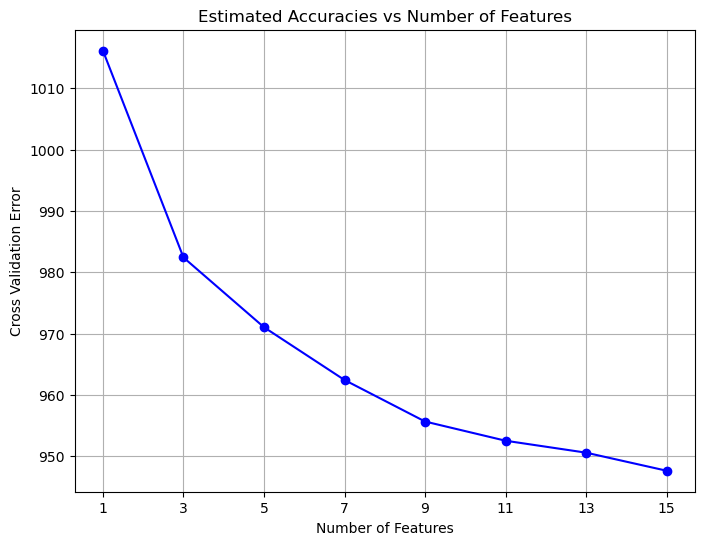

In [587]:
num_features_values = range(1, 16, 2)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(num_features_values, estimated_errors, marker='o', linestyle='-', color='b')
plt.title('Estimated Accuracies vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Error')
plt.xticks(num_features_values)  # Set x-axis ticks to the specified values
plt.grid(True)
plt.show()

We can see that the cross validation error drops. Hence we decide to use 3 components for less information loss and computational simplicity. 

In [588]:
kept_distinct_from_ids, kept_distinct_to_ids, filtered_matrix, processed_data = pre_process_data(train_data, 10,10)
W_3,H_3 = nmf(filtered_matrix,3)


Number of entries: 72141
Number of entries after removing row/columns with too few entries: 62941


In [589]:
reconstructed_matrix = W_3 @ H_3
mask_filtered_matrix = (~filtered_matrix.isnull()).astype(int).values
avg_error = np.square(np.linalg.norm((filtered_matrix - reconstructed_matrix * mask_filtered_matrix).fillna(0).values,ord='fro'))/filtered_matrix.count().sum()
print("The average error is", avg_error)


The average error is 0.15063382176739393


The maximum threshold is around  0.06060606060606061


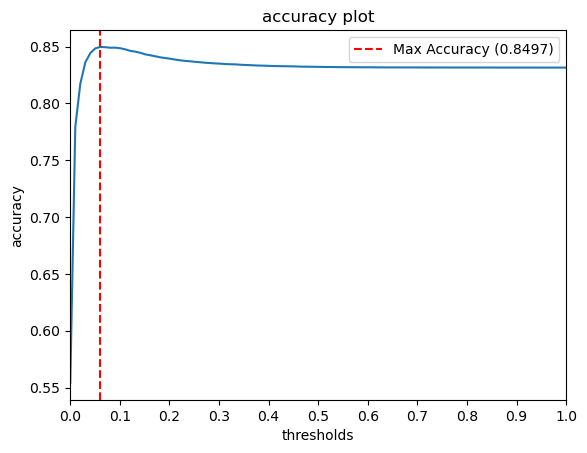

In [590]:
thresholds = np.linspace(0, 1, num=100)  # Define your threshold range
total_entries = filtered_matrix.count().sum()
accuracy = []

for threshold in thresholds:
    # Create a binary matrix based on the threshold
    binary_matrix = (reconstructed_matrix > threshold).astype(int)
    
    
    
    # Calculate false negatives and false positives
    true_positive = np.sum((filtered_matrix.values == 1) & (binary_matrix == 1))
    
    true_negative = np.sum((filtered_matrix.values == 0) & (binary_matrix == 0))
    
    # Append to lists
    accuracy.append((true_positive + true_negative)/total_entries)


plt.plot(thresholds,accuracy)

plt.xlabel('thresholds')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.xlim(0, 1.0)
plt.xticks(np.linspace(0, 1.0, num=11)) 

max_accuracy = max(accuracy)
max_threshold = thresholds[accuracy.index(max_accuracy)]
print("The maximum threshold is around ", max_threshold)
plt.axvline(x=max_threshold, color='r', linestyle='--', label=f'Max Accuracy ({max_accuracy:.4f})')

# Show legend
plt.legend()
plt.show()

Here we calculate the accuracies of reconstructed matrices with different thresholds, regardless of the predictions of empty values in the original matrix. We count the proportion of summation of true positive and true negative cases in the amount of all non-null values as the accuracy. Then choose the recommendation threshold that gives the best accuracy. The threshold we choose is around 0.06, giving the best accuracy: 0.8497. 

## Distance-based recommender system

In [536]:
class HashFunction:
    """
    This HashFunction class can be used to create an unique hash given an alpha and beta.
    """
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta

    def hashf(self, x, n):
        """
        Returns a hash given integers x and n.
        :param x: The value to be hashed
        :param n: The number of unique ids of all sets
        :return: The hashed value x given alpha and beta
        """
        
        hash_value = 0
        hash_value =  (self.alpha * x + self.beta) % n
        return hash_value
    
def compute_signature(hashes: list[HashFunction], ids: list[set[int]]):
    """
    This function will calculate the MinHash signature matrix from our sets of ids
    using the list of hash functions (hashes)
    :param hashes: The list of hash functions of arbitrary length
    :param ids: The list of sets of ids
    :return: The MinHash signature matrix for the given sets of ids
    """
    
    result = np.full((len(hashes), len(ids)), sys.maxsize)
    space = set().union(*ids)
    sorted_space = sorted(space)
    
    # START ANSWER
    for permutation_index in range(len(sorted_space)):
        for row_index, hash_function in enumerate(hashes):
            h_permutation = hash_function.hashf(permutation_index, len(sorted_space)) #hash 1
            for column in range(result.shape[1]):
                if sorted_space[permutation_index] in ids[column]:
                    if h_permutation < result[row_index][column]:
                        result[row_index][column] = h_permutation
                    
    # END ANSWER
    
    return result

After computing the min-hash signature matrix, similar sets of liked IDs should have similar columns in the signature matrix. We now use the function in the block below to group columns with equal values in this matrix, so that we can group users with the same preferences in the same groups. Note: the list of groups we return has non-increasing sizes, so that we can easily observe the groups of users with the most common preferences. 

In [537]:
def extract_same_hashes(signature_matrix):
    """
    Extracts rows and columns with the same hash signatures.
    :param signature_matrix: The MinHash signature matrix
    :return: Two arrays - one for rows and one for columns with the same hash signatures
    """
    # row_groups = {}
    col_groups = {}
    num_cols = signature_matrix.shape[1]

    # Find columns with the same hash signatures
    for col_idx in range(num_cols):
        signature = tuple(signature_matrix[:, col_idx])
        if signature not in col_groups:
            col_groups[signature] = []
        col_groups[signature].append(col_idx)
    # Sort the user id groups base on decreasing order of size
    sorted_col_groups = sorted(col_groups.values(), key=lambda x: len(x), reverse=True)
    return sorted_col_groups

Now we want to preprocess the data. We want to have a list containing sets of preferences(user_to_ids) of different users so that we can pass this list as the second argument(id_set) of the compute_signature function. In order to analyze the clients with the same kinds of preferences. 

In [538]:
# Filter the DataFrame where 'is_like' is True
liked_data = train_data[train_data['is_like'] == True]

# Get unique user_from_ids
unique_user_from_ids = liked_data['user_from_id'].unique()

# Create a list of sets of user_to_ids based on user_from_id
id_set_per_from_id = []
for user_id in unique_user_from_ids:
    # Array of user_data of current user_id in this iteration
    user_data = liked_data[liked_data['user_from_id'] == user_id] 
    # Convert to set
    user_to_ids = set(user_data['user_to_id'])
    # Append to list, later we are going to pass this to our function
    id_set_per_from_id.append(user_to_ids)

print(id_set_per_from_id)

[{2339, 1995, 43, 1775, 662}, {1154, 2247, 2345, 2410, 2795, 3404, 1809, 210, 2390}, {2693, 2792, 3081, 430, 943, 1874, 2514, 3286, 728, 1785, 378, 2555, 351}, {1922, 526, 3087, 2064, 3348, 662, 1691, 668, 3614, 2975, 546, 2595, 36, 2339, 167, 807, 679, 686, 1208, 2495, 450, 1865, 3018, 1995, 591, 604, 1895, 2408, 3055, 1777, 114}, {485, 870, 2762, 1195, 378, 1296, 1780, 1050, 2043, 156, 1949, 2623}, {2245, 392, 2345, 268, 595, 2485, 3612}, {396, 1682, 1426, 2208, 1569, 2482, 826, 192, 452, 1478, 455, 3148, 470, 3172, 2026, 1644, 757, 2039, 1151}, {2721, 134, 393, 1673, 1451, 1547, 3018, 1228, 49, 3477, 632, 3194, 1596, 1151, 2943}, {1633, 2307, 1571, 2339, 1739, 1228, 2837, 470, 218}, {642, 1156, 613, 2598, 2488, 2823, 588, 943, 1296, 1584, 2864, 1240, 1785, 283, 2046}, {1793, 712, 585, 392, 2732, 1293, 685, 943, 403, 3286, 3223, 3612}, {3335, 2762, 268, 3276, 945, 595, 3155, 1301, 2012, 191}, {3201, 2572, 2838, 3223, 1577, 2732, 685, 943, 2612, 2762, 1618, 1238, 728, 3547, 478, 351, 

Also, we want to have a list containing sets of preferences(user_from_ids) of different users so that we can be able to analyze the same types of users(user_to_id) who are liked by the same user groups(user_from_id). 

In [539]:
unique_user_to_ids = liked_data['user_to_id'].unique()

# Create a list of sets of user_to_ids based on user_from_id
id_set_per_to_id = []
for user_id in unique_user_to_ids:
    # Array of user_data of current user_id in this iteration
    user_data = liked_data[liked_data['user_to_id'] == user_id] 
    # Convert to set
    user_from_ids = set(user_data['user_from_id'])
    # Append to list, later we are going to pass this to our function
    id_set_per_to_id.append(user_from_ids)

print(id_set_per_to_id)

[{832, 835, 814, 816, 786, 820, 821, 310, 823, 629, 826, 283, 828, 93, 830}, {64, 1605, 903, 661, 918, 1593, 1050, 667, 670}, {1600, 1152, 99, 676, 1572, 1187, 1603, 2472, 3305, 651, 1873, 914, 147, 1983, 2367}, {290, 643, 1957, 1161, 298, 1678, 464, 754, 820, 821, 731, 62}, {1601, 131, 1573, 1606, 2503, 200, 198, 1898, 1581, 1869, 146, 115, 3478, 156, 2621}, {2211, 1385, 650, 654, 1425, 659, 2201, 1178, 2270, 3006}, {641, 1161, 907, 20, 25, 26, 27, 1052, 539, 1058, 164, 551, 41, 2097, 2098, 2101, 54, 57, 1984, 71, 80, 723, 91, 92, 93, 94}, {1410, 902, 134, 1415, 14, 1424, 1171, 2197, 666, 2074, 2205, 29, 2337, 2723, 548, 2725, 1450, 2731, 174, 1464, 2748, 1469, 1598, 2750, 2755, 967, 2633, 969, 970, 976, 2268, 2014, 2148, 742, 1386, 2156, 1791}, {677, 134, 902, 968, 136, 1450, 619, 2284, 2444, 1454, 2150, 3223, 1464, 2969, 732, 1790, 2047}, {3232, 3385, 2428, 1868}, {901, 649, 654, 1424, 1683, 659, 534, 1049, 26, 667, 931, 681, 169, 1198, 60, 1479, 1740, 80, 2386, 1750, 2009, 1385}, {

### Hash Functions
here we have a function for generating the list of hash functions. 

In [540]:
def generate_hash_functions(num_functions):
    hash_functions = []
    for _ in range(num_functions):
        a = random.randint(1, 1000)
        b = random.randint(1, 1000)
        hash_functions.append(HashFunction(a,b))

    return hash_functions

In [541]:
def same_signature_neighbors(hash_functions,id_set,unique_user_ids):
    hash_signature_matrix = compute_signature(hash_functions,id_set)
    sorted_indices_set_same_hashes = extract_same_hashes(hash_signature_matrix)
    sorted_col_groups_with_user_ids = [
        [unique_user_ids[idx] for idx in group] for group in sorted_indices_set_same_hashes
    ] 
    return sorted_col_groups_with_user_ids

For example, the code below gives the neighbors with the same signatures with different user from ids, indicating the groups of users who liked exactly the same people. (3 hash functions)

In [542]:
hash_functions_3 = generate_hash_functions(3)
print(same_signature_neighbors(hash_functions_3, id_set_per_from_id, unique_user_from_ids))

[[3476, 400, 1021, 256, 2383, 242, 1621, 1343, 1505, 2058, 1362, 2232, 257], [777, 2326, 892, 2401, 1618, 2629, 1042, 1013, 262], [1539, 3073, 312, 998, 1000, 2950, 1002, 2114, 997], [1667, 345, 2979, 2234, 415, 2311, 853], [1067, 555, 610, 1070, 1076, 598, 880], [607, 1964, 2847, 2850, 2852, 713], [1016, 3635, 342, 1039, 1003, 785], [803, 1298, 1551, 1974, 389], [170, 397, 55, 34, 623], [1782, 2193, 2334, 1787, 3581], [3453, 3259, 3396, 3350], [2170, 2643, 2154, 2023], [1092, 1077, 879, 1916], [2396, 3354, 349, 519], [1819, 1299, 1825, 2432], [3020, 1247, 3674, 2], [1908, 1629, 512, 273], [592, 424, 3573, 2922], [1672, 443, 719, 344], [3549, 3185, 3513, 3206], [887, 764, 593, 3113], [303, 638, 629], [1837, 371, 240], [1293, 706, 385], [2728, 2881, 2086], [158, 2901, 1874], [229, 230, 269], [3168, 2957, 2958], [1004, 274, 258], [2683, 2970, 1981], [1250, 1271, 1253], [1246, 3464, 3131], [2632, 2630, 1643], [3027, 3183, 1], [2744, 3608, 3340], [2528, 2321, 2168], [867, 687, 700], [1396,

Intuitively, the more hash functions we have, the more permutation of rows we do. Using more hash functions increases the size of the signature matrix(number of rows), then the accuracy of the estimated similarity between sets will increase as well because it tends to give a more precise estimation of the Jaccard similarity. Since we are grouping the users with the exact same preferences/preferred by the same group of people, if we have very few permutations, we will end up with more users in the same groups since the dimensions are reduced relatively too much, the Jaccard similarity will not be precise enough. 

In [548]:
max_group_size_from_id = []
max_group_size_to_id = []
for i in range(1,11):
    hash_functions = generate_hash_functions(i)
    same_signature_from_ids = same_signature_neighbors(hash_functions, id_set_per_from_id, unique_user_from_ids)
    # Since the groups are sorted by decreasing order of sizes, 
    # so the first list has always the biggest size
    max_group_size_from_id.append(len(same_signature_from_ids[0]))
    same_signature_to_ids = same_signature_neighbors(hash_functions, id_set_per_to_id, unique_user_to_ids)
    max_group_size_to_id.append(len(same_signature_to_ids[0]))
print(max_group_size_from_id)
print(max_group_size_to_id)


[32, 17, 14, 14, 13, 13, 13, 13, 13, 13]
[21, 11, 8, 6, 6, 7, 6, 6, 6, 6]


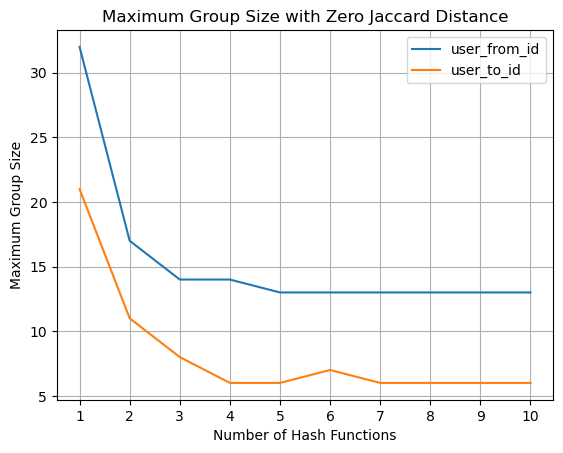

In [592]:
x = range(1,11,1)
plt.plot(x, max_group_size_from_id, label='user_from_id')
plt.plot(x, max_group_size_to_id, label='user_to_id')

# Add labels and title
plt.xlabel('Number of Hash Functions')
plt.ylabel('Maximum Group Size')
plt.title('Maximum Group Size with Zero Jaccard Distance')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()

Reducing the number of hash functions speeds up the computation and becomes more memory-efficient but might reduce the accuracy of the similarity estimation. From the plot above we can observe that when the number of hash functions is bigger than 3, the maximum group sizes are not changing much. So for this specific training data, we can choose 3 hash functions. 

In [550]:
same_signature_from_ids = same_signature_neighbors(hash_functions_3, id_set_per_from_id, unique_user_from_ids)
same_signature_to_ids = same_signature_neighbors(hash_functions_3, id_set_per_to_id, unique_user_to_ids)
print("Same type of users(with same preferences): ",same_signature_from_ids)
print("Same type of users(liked by same groups of people): ",same_signature_to_ids)


Same type of users(with same preferences):  [[3476, 400, 1021, 256, 2383, 242, 1621, 1343, 1505, 2058, 1362, 2232, 257], [777, 2326, 892, 2401, 1618, 2629, 1042, 1013, 262], [1539, 3073, 312, 998, 1000, 2950, 1002, 2114, 997], [1667, 345, 2979, 2234, 415, 2311, 853], [1067, 555, 610, 1070, 1076, 598, 880], [607, 1964, 2847, 2850, 2852, 713], [1016, 3635, 342, 1039, 1003, 785], [803, 1298, 1551, 1974, 389], [170, 397, 55, 34, 623], [1782, 2193, 2334, 1787, 3581], [3453, 3259, 3396, 3350], [2170, 2643, 2154, 2023], [1092, 1077, 879, 1916], [2396, 3354, 349, 519], [1819, 1299, 1825, 2432], [3020, 1247, 3674, 2], [1908, 1629, 512, 273], [592, 424, 3573, 2922], [1672, 443, 719, 344], [3549, 3185, 3513, 3206], [887, 764, 593, 3113], [303, 638, 629], [1837, 371, 240], [1293, 706, 385], [2728, 2881, 2086], [158, 2901, 1874], [229, 230, 269], [3168, 2957, 2958], [1004, 274, 258], [2683, 2970, 1981], [1250, 1271, 1253], [1246, 3464, 3131], [2632, 2630, 1643], [3027, 3183, 1], [2744, 3608, 3340],

In [551]:
# Filter the DataFrame where 'is_like' is True
unliked_data = train_data[train_data['is_like'] == False]

# Get unique user_from_ids
unliked_unique_user_from_ids = unliked_data['user_from_id'].unique()

# Create a list of sets of user_to_ids based on user_from_id
unliked_id_set_per_from_id = []
for user_id in unliked_unique_user_from_ids:
    # Array of user_data of current user_id in this iteration
    user_data = unliked_data[unliked_data['user_from_id'] == user_id] 
    # Convert to set
    user_to_ids = set(user_data['user_to_id'])
    # Append to list, later we are going to pass this to our function
    unliked_id_set_per_from_id.append(user_to_ids)


unliked_unique_user_to_ids = unliked_data['user_to_id'].unique()

# Create a list of sets of user_to_ids based on user_from_id
unliked_id_set_per_to_id = []
for user_id in unliked_unique_user_to_ids:
    # Array of user_data of current user_id in this iteration
    user_data = unliked_data[unliked_data['user_to_id'] == user_id] 
    # Convert to set
    user_from_ids = set(user_data['user_from_id'])
    # Append to list, later we are going to pass this to our function
    unliked_id_set_per_to_id.append(user_from_ids)

In [553]:
unliked_same_signature_from_ids = same_signature_neighbors(hash_functions_3, unliked_id_set_per_from_id, unliked_unique_user_from_ids)
unliked_same_signature_to_ids = same_signature_neighbors(hash_functions_3, unliked_id_set_per_to_id, unliked_unique_user_to_ids)
print("Same type of users(with same dislikes): ",unliked_same_signature_from_ids)
print("Same type of users(disliked by same groups of people): ",unliked_same_signature_to_ids)


Same type of users(with same dislikes):  [[3240, 3423, 3460, 3069, 2993, 3465, 3459, 3462, 3468, 3021, 3466], [1414, 2182, 2892, 3161, 2488, 3006, 1698, 3491, 955], [680, 760, 40, 1867, 30, 1856, 2770], [1927, 3278, 1931, 1847, 3279, 1928, 1930], [1095, 2278, 663, 913, 819, 20], [3142, 2547, 1953, 941, 1955, 2675], [1050, 79, 1101, 916, 166], [23, 1673, 1898, 2431, 2971], [538, 127, 86, 1575], [2010, 1812, 1814, 3413], [1738, 1305, 1652, 1651], [535, 2775, 2370, 163], [2553, 2476, 1945, 2551], [3151, 3150, 3697, 3696], [3027, 3022, 3624, 3671], [1743, 2735, 3082, 3086], [3709, 3708, 3581, 551], [1227, 3030, 1270, 3025], [3530, 3529, 1474, 2742], [419, 711, 423], [3483, 3484, 3485], [2191, 49, 41], [776, 1837, 2214], [292, 1645, 619], [1620, 1619, 2232], [3514, 3667, 1520], [3019, 3068, 1249], [2178, 2075, 2177], [200, 665, 1152], [143, 121, 3626], [2273, 2757, 2030], [1600, 2348, 1148], [1771, 1471, 1881], [2889, 2384, 2252], [1695, 1116, 2493], [3221, 3220, 2848], [2881, 3511, 3421], 